# Food Delivery Time Prediction: Case Study
Predicting the delivery time of your order is a challenging task for every food delivery service like Zomato and Swiggy.

One of the best strategies to predict the delivery time is by calculating the distance between the point of picking up the order and the point of delivering the order. And then predicting the delivery time based on how much time your delivery partners took to deliver orders in the past for the same distance.


#### Food Delivery services like GrubHub and UberEats need to show the accurate time it will take to deliver your order to keep transparency with their customers. These companies use Machine Learning algorithms to predict the food delivery time based on how much time the delivery partners took for the same distance in the past. 

Food Delivery Time Prediction
To predict the food delivery time in real-time, we need to calculate the distance between the food preparation point and the point of food consumption. After finding the distance between the restaurant and the delivery locations, we need to find relationships between the time taken by delivery partners to deliver the food in the past for the same distance.

So, for this task, we need a dataset containing data about the time taken by delivery partners to deliver food from the restaurant to the delivery location. I found an ideal dataset with all the features for this task. You can download the dataset from here.

In the section below, I will take you through the task of Food Delivery Time Prediction with Machine Learning using Python.

In [128]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt


In [163]:
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler 
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from scikeras.wrappers import KerasRegressor
import warnings
warnings.filterwarnings('ignore')

In [130]:
df_train = pd.read_csv('train.csv')
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


Dataset Features:
- ID: order ID number 
- Delivery_person_ID: ID number of the delivery partner
- Delivery_person_Age: Age of the delivery partner
- Delivery_person_Ratings: ratings of the delivery partner based on past deliveries
- Restaurant_latitude: The latitude of the restaurant
- Restaurant_longitude: The longitude of the restaurant
- Delivery_location_latitude: The latitude of the delivery location
- Delivery_location_longitude: The longitude of the delivery location
- Order_Date: Date order was placed
- Time_Time: The time order was placed
- Time_Order_picked: The time order was picked by the delivery partner
- Weatherconditions: Weather condition when the order was delivered
- Road_traffic_density: Road traffic status
- Vehicle_condition: Condition of the vehicle of the delivery partner
- Type_of_order: The type of meal ordered by the customer
- Type_of_vehicle: The type of vehicle delivery partner rides
- Multiple_deliveries: If there were multiple deliveries
- Festival: If it was the day of the festival
- City: Type of the city
- Time_taken(min): The time taken by the delivery partner to complete the order

## Data Profiling

In [131]:
print("Train Dataset :", df_train.shape)

Train Dataset : (45593, 20)


In [132]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [133]:
#get summary statistics of the numerical features of the data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [134]:
#get summary statistics of the non-numerical features of the data
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,45593,45593,0x4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


### Documenting Findings:
- Update col names
- Calculate distance
- Change data type of Age, Rating, Time taken
- Clean weatherconditions, time taken, citycode
- Clean/segregate all datetime cols
- Drop ID and Delivery_person_ID

## Data Formatting and Cleaning

### Renaming Columns

In [135]:
#update column names
def update_column_name(df):
    #Renaming Weatherconditions column
    df.rename(columns={'Weatherconditions': 'Weather_conditions',
                      'multiple_deliveries':'Multiple_deliveries',
                      'City':'City_type'},inplace=True)
    
update_column_name(df_train)
print(df_train.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'Multiple_deliveries', 'Festival', 'City_type', 'Time_taken(min)'],
      dtype='object')


### Find Geodesic Distance - Calculate distance between 2 points given their Longitudes and Latitudes
We will use the Haversine formula to calculate this distance. It calculates the shortest distance over the earth's surface, giving an "as-the-crow-flies" distance between the points (assuming a spherical Earth, which is a good approximation for most distances).

In [136]:
#calculate distance usine haversine
from haversine import haversine
df_train['Distance'] = df_train.apply(lambda row: haversine(
    (row['Restaurant_latitude'], row['Restaurant_longitude']), 
    (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
), axis=1)
df_train['Distance'] = df_train['Distance'].round()
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Multiple_deliveries,Festival,City_type,Time_taken(min),Distance
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,3.0
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,20.0
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,2.0
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,8.0
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,6.0


In [137]:
#clean weather conditions, time taken and create a column for city
def extract_column_value(df):
    #Extract time and convert to int
    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: (x.split(' ')[1].strip()))
    #Extract Weather conditions
    df['Weather_conditions'] = df['Weather_conditions'].apply(lambda x: x.split(' ')[1].strip())
    #Extract city code from Delivery person ID
    df['City']=df['Delivery_person_ID'].str.split("RES", expand=True)[0]
    
extract_column_value(df_train)
df_train[['Time_taken(min)','Weather_conditions','City']].head()

,Time_taken(min),Weather_conditions,City
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


### Change data types of columns

In [138]:
#change data types of columns
df_train['Delivery_person_Age'] = df_train['Delivery_person_Age'].astype(float)
df_train['Delivery_person_Ratings'] = df_train['Delivery_person_Ratings'].astype(float)
df_train['Time_taken(min)'] = df_train['Time_taken(min)'].astype(float)
df_train['Multiple_deliveries'] = df_train['Multiple_deliveries'].astype(float)
df_train['Order_Date']=pd.to_datetime(df_train['Order_Date'],format="%d-%m-%Y")
df_train['Vehicle_condition']=df_train['Vehicle_condition'].astype(float)

### Check for duplicates

In [139]:
#check for duplicates
df_train.duplicated().sum()

0

### Handle missing values

In [140]:
#convert String 'NaN' to np.nan
df_train.replace('NaN', float(np.nan), regex=True,inplace=True)

In [141]:
#check null values
df_train.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City_type                      1200
Multiple_deliveries             993
Weather_conditions              616
Road_traffic_density            601
Festival                        228
Vehicle_condition                 0
Distance                          0
Time_taken(min)                   0
Type_of_vehicle                   0
Type_of_order                     0
ID                                0
Delivery_person_ID                0
Time_Order_picked                 0
Order_Date                        0
Delivery_location_longitude       0
Delivery_location_latitude        0
Restaurant_longitude              0
Restaurant_latitude               0
City                              0
dtype: int64

##### - Handling null values for numeric: check for their distributions to find out which would be optimal way of imputing
##### - Handling null values non-numeric: impute with mode


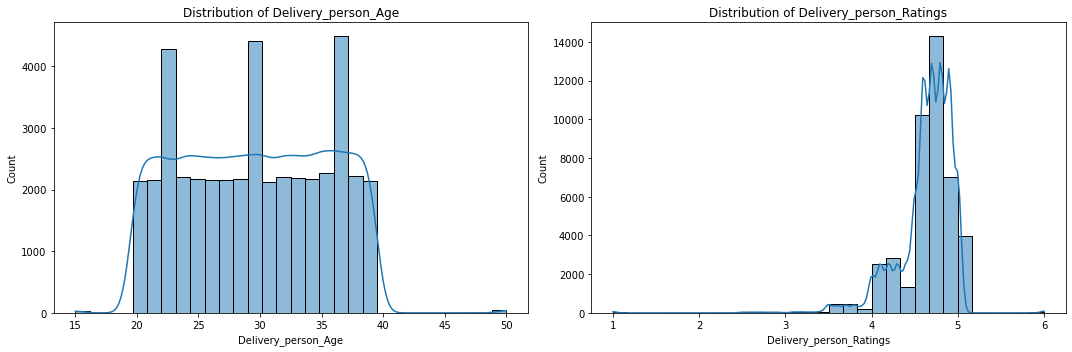

In [142]:
# Columns with null values
columns_with_nulls = ['Delivery_person_Age', 'Delivery_person_Ratings']

# Number of rows and columns for the subplot grid
n_rows = len(columns_with_nulls) // 2 + len(columns_with_nulls) % 2
n_cols = 2

# Create a figure and a set of subplots
plt.figure(figsize=(15, 5 * n_rows))

for i, column in enumerate(columns_with_nulls, 1):
    plt.subplot(n_rows, n_cols, i)
    # Choose plot type based on data type
    if df_train[column].dtype == 'object' or len(df_train[column].unique()) < 10:
        # If the data is categorical, use a count plot
        sns.countplot(x=column, data=df_train)
    else:
        # For numerical data, use a histogram or boxplot
        sns.histplot(df_train[column], kde=True, bins=30)
    
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

In [143]:
#imputation
df_train['Delivery_person_Age'].fillna(df_train['Delivery_person_Age'].median(), inplace=True)
df_train['Weather_conditions'].fillna(np.random.choice(df_train['Weather_conditions']), inplace=True)
df_train['City_type'].fillna(df_train['City_type'].mode()[0], inplace=True)
df_train['Festival'].fillna(df_train['Festival'].mode()[0], inplace=True)
df_train['Multiple_deliveries'].fillna(df_train['Multiple_deliveries'].mode()[0], inplace=True)
df_train['Road_traffic_density'].fillna(df_train['Road_traffic_density'].mode()[0], inplace=True)
df_train['Delivery_person_Ratings'].fillna(df_train['Delivery_person_Ratings'].median(), inplace=True)

In [149]:
df_train.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
Multiple_deliveries               0
Festival                          0
City_type                         0
Time_taken(min)                   0
Distance                          0
City                              0
month                             0
quarter                           0
year                              0
day_of_week                       0
is_weekend                        0
Processing_time             

### Feature Engineering

In [145]:
df_train["month"] = df_train.Order_Date.dt.month.astype(object)
df_train["quarter"] = df_train.Order_Date.dt.quarter.astype(object)
df_train["year"] = df_train.Order_Date.dt.year.astype(object)
df_train['day_of_week'] = df_train.Order_Date.dt.day_of_week.astype(object)
df_train['is_weekend'] = np.where(df_train['day_of_week'].isin([5,6]),1,0).astype(object)
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Festival,City_type,Time_taken(min),Distance,City,month,quarter,year,day_of_week,is_weekend
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,...,No,Urban,24.0,3.0,INDO,3,1,2022,5,1
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,...,No,Metropolitian,33.0,20.0,BANG,3,1,2022,4,0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,...,No,Urban,26.0,2.0,BANG,3,1,2022,5,1
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,...,No,Metropolitian,21.0,8.0,COIMB,4,2,2022,1,0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,...,No,Metropolitian,30.0,6.0,CHEN,3,1,2022,5,1


In [148]:
df_train['Processing_time'] = (pd.to_datetime(df_train['Time_Order_picked'])-pd.to_datetime(df_train['Time_Orderd'])).dt.components.minutes
df_train['Processing_time'].fillna(0,inplace=True)

In [150]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          45593 non-null  float64       
 3   Delivery_person_Ratings      45593 non-null  float64       
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  43862 non-null  object        
 10  Time_Order_picked            45593 non-null  object        
 11  Weather_conditions           45593 non-nu

#### Drop unnecessary columns

In [151]:
#drop ID and Delivery person ID as they wont be used in the prediction
df_train.drop(['ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Orderd','Time_Order_picked'],axis=1,inplace=True)

## Data Preprocessing

### Label Encoding

In [152]:
categorical_columns = df_train.select_dtypes(include='object').columns
df_train[categorical_columns] = df_train[categorical_columns].apply(lambda col: LabelEncoder().fit_transform(col))
df_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Multiple_deliveries,Festival,City_type,Time_taken(min),Distance,City,month,quarter,year,day_of_week,is_weekend,Processing_time
0,37.0,4.9,4,0,2.0,3,2,0.0,0,2,24.0,3.0,10,1,0,0,5,1,15.0
1,34.0,4.5,3,1,2.0,3,3,1.0,0,0,33.0,20.0,3,1,0,0,4,0,5.0
2,23.0,4.4,2,2,0.0,1,2,1.0,0,2,26.0,2.0,3,1,0,0,5,1,15.0
3,38.0,4.7,4,3,0.0,0,2,1.0,0,0,21.0,8.0,6,2,1,0,1,0,10.0
4,32.0,4.6,0,0,1.0,3,3,1.0,0,0,30.0,6.0,5,1,0,0,5,1,15.0


In [153]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45593 non-null  float64
 1   Delivery_person_Ratings  45593 non-null  float64
 2   Weather_conditions       45593 non-null  int32  
 3   Road_traffic_density     45593 non-null  int32  
 4   Vehicle_condition        45593 non-null  float64
 5   Type_of_order            45593 non-null  int32  
 6   Type_of_vehicle          45593 non-null  int32  
 7   Multiple_deliveries      45593 non-null  float64
 8   Festival                 45593 non-null  int32  
 9   City_type                45593 non-null  int32  
 10  Time_taken(min)          45593 non-null  float64
 11  Distance                 45593 non-null  float64
 12  City                     45593 non-null  int32  
 13  month                    45593 non-null  int32  
 14  quarter               

### Train Test Split

In [154]:
X = df_train.drop('Time_taken(min)', axis=1)  # Features
y = df_train['Time_taken(min)']  # Target variable

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36474, 18)
(36474,)
(9119, 18)
(9119,)


### Standardization

In [165]:
#create a StandardScaler object
scaler = StandardScaler()

#fit the scaler on the training data
scaler.fit(X_train)

#perform standardization on the training data
X_train = scaler.transform(X_train)

#perform standardization on the testing data
X_test = scaler.transform(X_test)

#for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [169]:
def create_lstm_model(input_shape):
    def model():
        lstm_model = Sequential()
        lstm_model.add(LSTM(50, activation='relu', input_shape=input_shape))
        lstm_model.add(Dense(1))
        lstm_model.compile(optimizer='adam', loss='mean_squared_error')
        return lstm_model
    return model

input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])

models = [
    LinearRegression(),
    xgb.XGBRegressor(),
    KerasRegressor(build_fn=create_lstm_model(input_shape=input_shape), epochs=100, batch_size=32, verbose=0)
]

param_grid = [
    {},
    {'max_depth': [3, 5]},
    {'n_estimators': [50, 100,200]},
    {'n_estimators': [20, 25,30], 'max_depth': [5, 7,9]},
    {'batch_size': [16, 32]}
]

for i, model in enumerate(models):
    if model.__class__.__name__ == 'KerasRegressor':
        X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_reshaped, y_train, test_size=0.2, random_state=42)
        model.fit(X_train_split, y_train_split)
        y_pred = model.predict(X_val_split)
        cv_rmse = sqrt(mean_squared_error(y_val_split, y_pred))
    else:
        grid_search = RandomizedSearchCV(model, param_grid[i], n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=1)
        grid_search.fit(X_train, y_train)
        cv_rmse = sqrt(-grid_search.best_score_)

    print(f"{model.__class__.__name__}:")
    if model.__class__.__name__ != 'KerasRegressor':
        print("Best parameters:", grid_search.best_params_)
    print("Best RMSE score:", cv_rmse)
    print()

LinearRegression:
Best parameters: {}
Best RMSE score: 7.1464370429359745

XGBRegressor:
Best parameters: {'max_depth': 5}
Best RMSE score: 4.089269429501541

KerasRegressor:
Best RMSE score: 5.478308468339494

